# Aproximação e Interpolação: solução dos problemas propostos

Este notebook apresenta a solução dos problemas propostos na aula 01, Apriximação e Interpolação.


<!-- TEASER_END -->

In [1]:
using PyPlot

In [2]:
using Polynomials

In [3]:
using BenchmarkTools

In [4]:
struct Lagrange
    x::Vector{Float64}
    y::Vector{Float64}
    Lagrange(x, y) = new(copy(x), copy(y))
end
Base.Broadcast.broadcastable(lgr::Lagrange) = Ref(lgr)

function lagrange(k, z, x)
 h = 1.0
    n = length(z)
    for i = 1:(k-1)
        h *= (x - z[i]) / (z[k] - z[i])
    end
    
    for i = (k+1):n
        h *= (x - z[i]) / (z[k] - z[i])
    end
    return h
end

function interp(lgr::Lagrange, x)
    
    y = lgr.y[1] * lagrange(1, lgr.x, x)
    
    for i = 2:length(lgr.x)
        y += lgr.y[i] * lagrange(i, lgr.x, x)
    end
    
    return y
end

    
(lgr::Lagrange)(x) = interp(lgr, x)    

In [5]:
struct LinearInterp
    x::Vector{Float64}
    y::Vector{Float64}
    LinearInterp(x, y) = new(copy(x), copy(y))
end
Base.Broadcast.broadcastable(lin::LinearInterp) = Ref(lin)

function interp(lin::LinearInterp, x)
    
    if x < lin.x[1] || x > lin.x[end]
        error("Fora do Range")
    end
    
    index = 2
    n = length(lin.x)
    for i = 2:n
        if lin.x[i] >= x
            index = i
            break
        end
    end
    i1 = index-1
    return lin.y[i1] + (lin.y[index] - lin.y[i1]) * (x - lin.x[i1]) / (lin.x[index] - lin.x[i1])
    
end

(lin::LinearInterp)(x) = interp1(lin, x)


In [6]:
function linfit(x,y)
    sx = sum(x)
    sx2 = sum(x->x^2, x)
    N = length(x)

    sy = sum(y)
    syx = sum(x[i]*y[i] for i in 1:N)
    
    return [N sx; sx sx2] \ [sy; syx]
end

linfit (generic function with 1 method)

# Exercícios

## Problema 1

Interpole a função de Runge com $-1 \le x \le 1$:
$$
f(x) = \frac{1}{1 + 25x^2}
$$

 1. Use 11 pontos uniformemente distribuídos
 2. Aumente o número de pontos
 3. Tente usar os pontos $x_k = \cos\left(\frac{k\pi}{N}\right)$ para $k = 0\ldots N$.
 4. Brinque com o número de pontos



In [7]:
f(x) = 1.0 / (1.0 + 25x^2)
x0 = range(-1.0, 1.0, length=501)
y0 = f.(x0);

### Pontos uniformemente distribuídos

In [8]:
x = range(-1.0, 1.0, length=11)
y = f.(x);


In [9]:
lgr = Lagrange(x, y)

Lagrange([-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0.038461538461538464, 0.05882352941176469, 0.1, 0.19999999999999996, 0.5, 1.0, 0.5, 0.19999999999999996, 0.1, 0.05882352941176469, 0.038461538461538464])

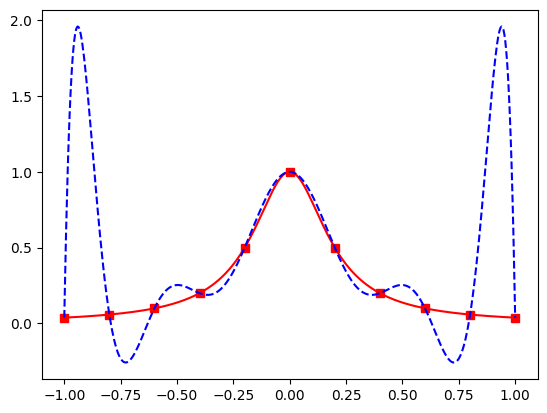

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b1fe67610>

In [10]:
u = lgr.(x0);
plot(x0, y0, "r-")
plot(x, y, "rs")
plot(x0, u, "b--")

**Tá interpolando!** Mas que bosta!!!
Será que é o número de pontos? Vamos ver...

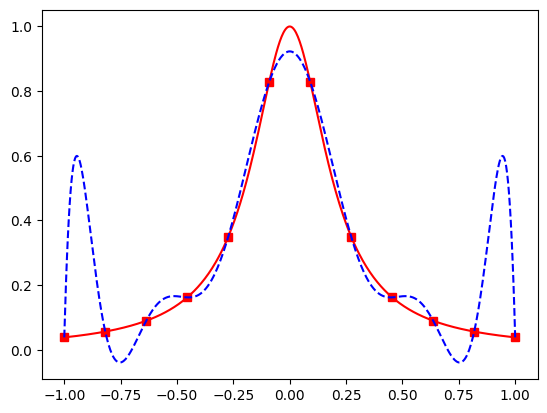

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b2a7f5ee0>

In [11]:
x = range(-1.0, 1.0, length=12)
y = f.(x)
lgr = Lagrange(x, y)
u = lgr.(x0);
plot(x0, y0, "r-")
plot(x, y, "rs")
plot(x0, u, "b--")

**Com 12 pontos, Melhorou as extremidades mas piorou o centro**. Vamos tentar com 13 pontos

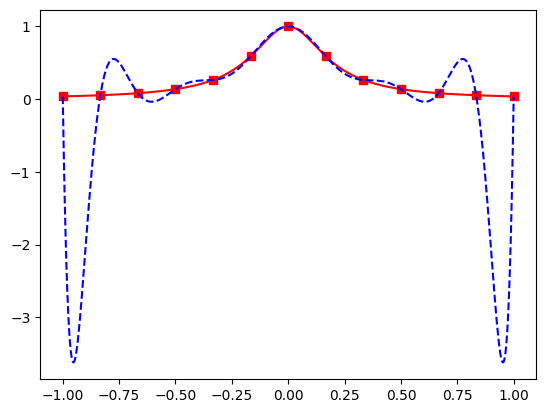

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b2a773310>

In [12]:
x = range(-1.0, 1.0, length=13)
y = f.(x)
lgr = Lagrange(x, y)
u = lgr.(x0);
plot(x0, y0, "r-")
plot(x, y, "rs")
plot(x0, u, "b--")

**Tem algo estranho!!! Vamos aumentar bastante o número de pontos** 

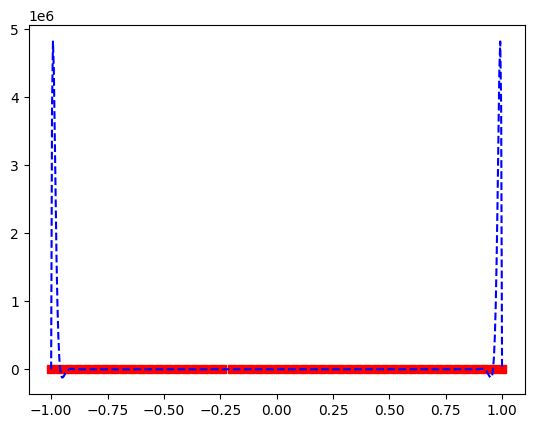

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b1fad3a00>

In [13]:
x = range(-1.0, 1.0, length=51)
y = f.(x)
lgr = Lagrange(x, y)
u = lgr.(x0);
plot(x0, y0, "r-")
plot(x, y, "rs")
plot(x0, u, "b--")

**Repare na escala. Tem um 1e6, ou seja o valor chega a 5 milhões. Será que a função realmente está interpolando???**

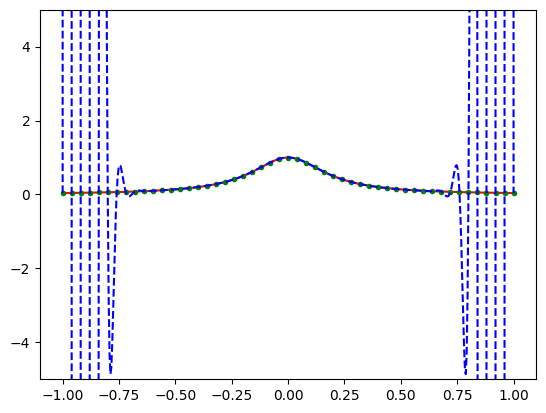

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b2a7855e0>

In [14]:
plot(x0, y0, "r-")
ylim([-5, 5])
plot(x, y, "g.")
plot(x0, u, "b--")

**Continua interpolando!?! Mas aumentando o número de pontos, só piora... Vamos ver o que acontece com número de pontos pares.**

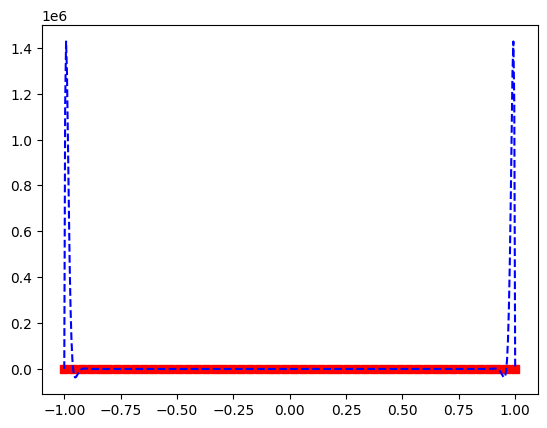

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b1fb08070>

In [15]:
x = range(-1.0, 1.0, length=52)
y = f.(x)
lgr = Lagrange(x, y)
u = lgr.(x0);
plot(x0, y0, "r-")
plot(x, y, "rs")
plot(x0, u, "b--")

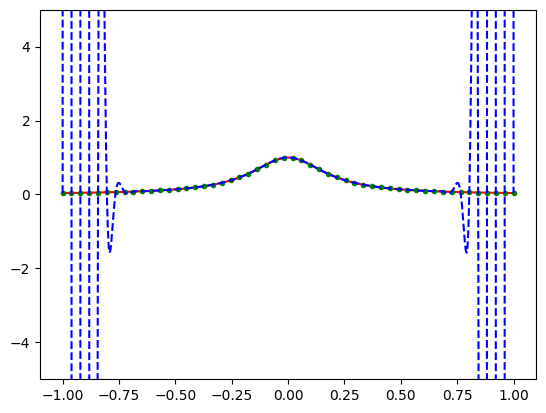

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b1d2bc460>

In [16]:
plot(x0, y0, "r-")
ylim([-5, 5])
plot(x, y, "g.")
plot(x0, u, "b--")

**É... Quanto mais pontos pior fica! Isto é o fenômeno de Runge**.

### Pontos $x_k = \cos\left(\frac{k\pi}{N}\right)$

In [17]:
chebpoints(N) = cos.((0:N) .* π ./ N )

chebpoints (generic function with 1 method)

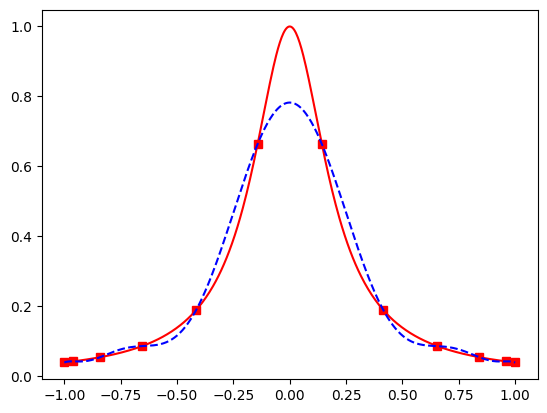

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b18c06580>

In [18]:
x = chebpoints(11);
y = f.(x);
lgr = Lagrange(x, y)
u = lgr.(x0);
plot(x0, y0, "r-")
plot(x, y, "rs")
plot(x0, u, "b--")


**Não está muito bom mas está melhor do que antes**

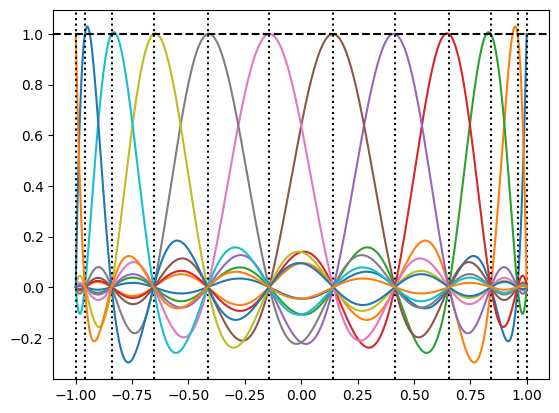

PyObject <matplotlib.lines.Line2D object at 0x7f0b18b3c8e0>

In [19]:
for i in 1:length(x)
    l0 = lagrange.(i, Ref(x), x0)
    plot(x0, l0)
    axvline(x[i], color="k", ls=":")
end
axhline(1.0, c="k", ls="--")


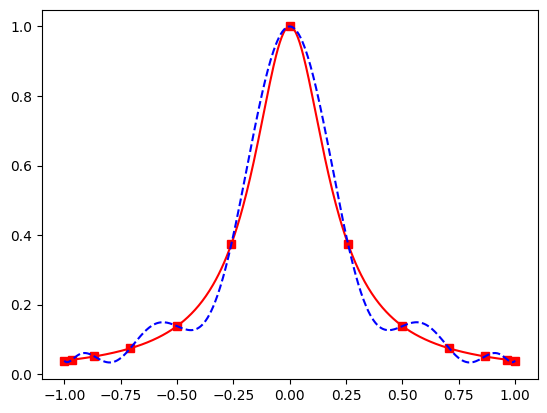

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b18aacd30>

In [20]:
x = chebpoints(12);
y = f.(x);
lgr = Lagrange(x, y)
u = lgr.(x0);
plot(x0, y0, "r-")
plot(x, y, "rs")
plot(x0, u, "b--")


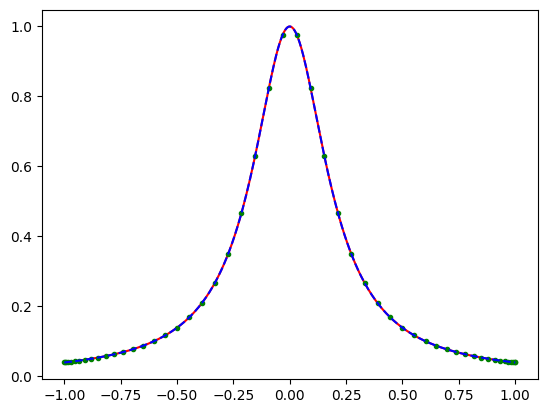

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b059a3880>

In [21]:
x = chebpoints(51);
y = f.(x);
lgr = Lagrange(x, y)
u = lgr.(x0);
plot(x0, y0, "r-")
plot(x, y, "g.")
plot(x0, u, "b--")


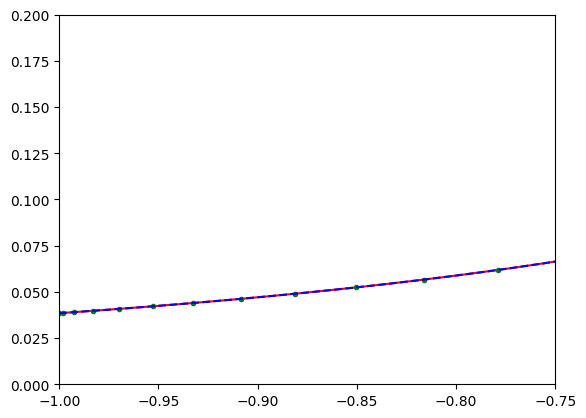

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b059923d0>

In [22]:
plot(x0, y0, "r-")
xlim([-1.0, -0.75])
ylim([0.0, 0.2])
plot(x, y, "g.")
plot(x0, u, "b--")


In [23]:
maximum(abs, u-y0)

7.793317685877987e-5

### Vamos ver como o erro se comporta?

In [28]:
function maxerr(fun, n, xpts)
    x = chebpoints(n)
    y = fun.(x)
    lgr = Lagrange(x, y)
    y0 = fun.(x0)
    u0 = lgr.(x0)
    plot(x0, y0, "r-")
    plot(x0, u0, "b--")
    plot(x, y, "g.")
    
    return maximum(abs, u0 - y0)
    
end

maxerr (generic function with 1 method)

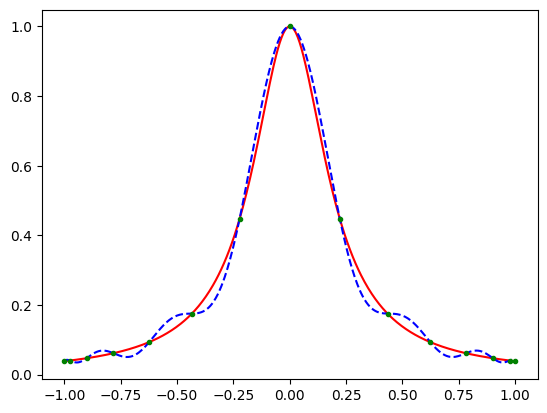

0.05350803943024096

In [41]:
maxerr(f, 14, x0)

In [25]:
N = 2:50
ε = maxerr.(f, N, Ref(x0));


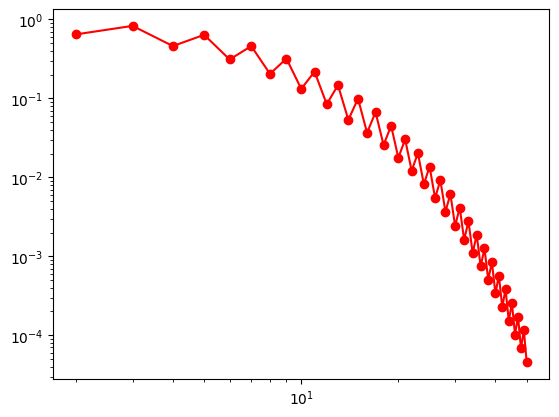

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b057b7be0>

In [42]:
#semilogy(N, ε, "ro-")
loglog(N, ε, "ro-")

## Problema 2

Procure na Net o método de diferenças divididas de Newton a interpole a função anterior nos mesmos pontos. Este método é simplesmente um jeito inteligente de resolver a matriz apresentada lá em cima.



### Diferenças divididas de Newton

In [45]:
function divdiffmat(x)
    n = length(x)
    
    A = zeros(n,n)
    for i = 1:n
        A[i,1] = 1.0
        for k in 2:i
            A[i, k] = A[i,k-1] * (x[i] - x[k-1])
        end
    end
    
    return A
    
end

divdiffmat (generic function with 1 method)

In [46]:
using LinearAlgebra

In [47]:
struct DividedDiff
    x::Vector{Float64}
    a::Vector{Float64}
end
function divideddiff(x, y)
    A = LowerTriangular(divdiffmat(x))
    a = A\y
    return DividedDiff(copy(x), a)
end
Base.Broadcast.broadcastable(ddif::DividedDiff) = Ref(ddif)


function interp(ddif::DividedDiff, x)
    xx = ddif.x
    a = ddif.a
    
    y = a[end] 
    
    for i in (lastindex(a)-1):-1:1
        y = a[i] + (x-xx[i])*y
    end
    return y
end
(ddif::DividedDiff)(x) = interp(ddif, x)


## Algorítmo de Newton

Um jeito interessante de calcular a interpolação usando diferenças divididas. Ao se resolver o sistema linear, pode-se escrever a solução como:

$$
\begin{align}
a_0 &= f(x_0)\\
a_1 & = \frac{f(x_1) - f(y_0)}{x_1 - x_0}\\
a_2 &= \frac{\frac{f(x_2)-f(x_0)}{x_2-x_0} - \frac{f(x_1) - f(x_0)}{x_1-x_0} }{x_2 - x_1}\\
\vdots &=  \vdots\\
\end{align}
$$

o k-ésimo coeficiente vale:
$$
a_k = \mathcal{F}\left(x_0, x_1, \ldots, x_k\right)
$$

com 
$$
\mathcal{F}\left(x_0, x_1, \ldots, x_k\right) = \frac{\mathcal{F}\left(x_0, x_1, \ldots, x_{k-1}\right) -\mathcal{F}\left(x_1, x_1, \ldots, x_k\right)}{x_0-x_k}
$$

In [48]:
function newton_divdiff(x, y)
    
    n = length(x)
    F = zeros(n)
    F0 = zeros(n)
    F1 = zeros(n)
    
    F0[1] = y[1]
    F1[1] = y[1]
    F[1] = y[1]
    
    for i = 2:n
        F1[1] = y[i]
        for k in 2:i
            F1[k] = (F1[k-1] - F0[k-1]) / (x[i] - x[i-k+1])
        end
        F[i] = F1[i]
        for k in 1:i
            F0[k] = F1[k]
        end
    end
    
    return DividedDiff(copy(x), F)
    
end


newton_divdiff (generic function with 1 method)

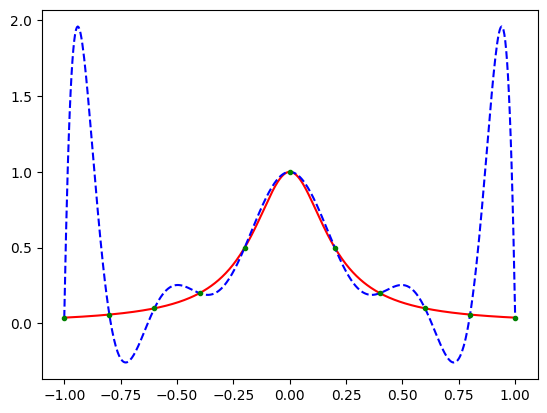

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b055bccd0>

In [49]:
x = range(-1.0, 1.0, length=11)
y = f.(x)
ddiff = divideddiff(x, y)
y0 = f.(x0)
u = ddiff.(x0);

plot(x0, y0, "r-")
plot(x0, u, "b--")
plot(x, y, "g.")

**Alguém esperava algo melhor? Existe apenas um polinômio passando por um conjunto de pontos!!!**

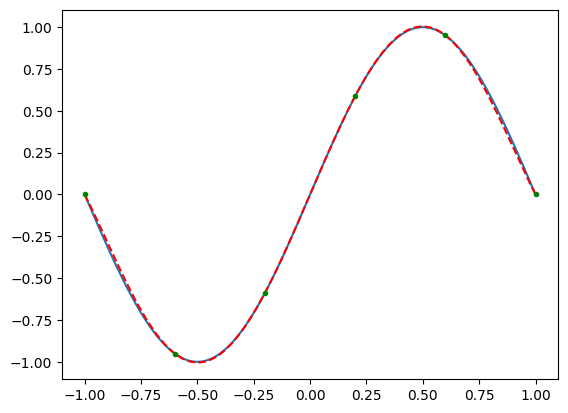

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b05577670>

In [55]:
f1(x) = sin(π*x)

x = range(-1, 1.0, length=6)
y = f1.(x);
ddiff = divideddiff(x, y)
plot(x0, f1.(x0))
plot(x0, interp.(ddiff, x0), "r--")
plot(x, y, "g.")


In [56]:
d1 = divideddiff(x, y)
d2 = newton_divdiff(x, y);

d1.a - d2.a

6-element Array{Float64,1}:
  0.0
  0.0
  0.0
  1.5543122344752192e-15
 -1.7763568394002505e-15
 -6.661338147750939e-16

### Problema 3

Use a biblioteca Interpolations.jl e Dierckx.jl para fazer as interpolações. Compare a interpolação linear com os splines.



In [57]:
using Interpolations

In [58]:
x = -1:0.2:1
y = f.(x);


In [59]:
itp1 = interpolate((x,),  y, Gridded(Constant()));
itp2 = interpolate((x,),  y, Gridded(Linear()));

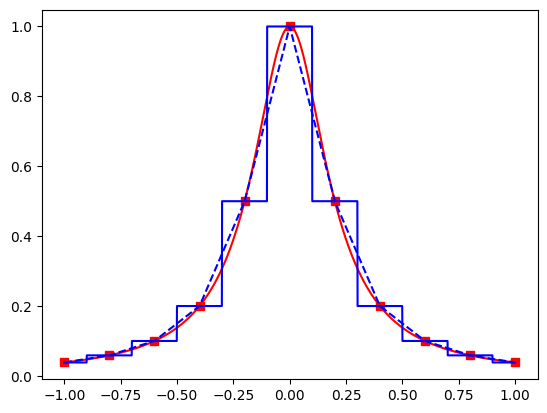

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b034827c0>

In [60]:
xx = -1:0.001:1
yy = f.(xx)
yy1 = itp1.(xx);
yy2 = itp2.(xx);
plot(x, y, "rs")
plot(xx, yy, "r-")
plot(xx, yy1, "b-")
plot(xx, yy2, "b--")

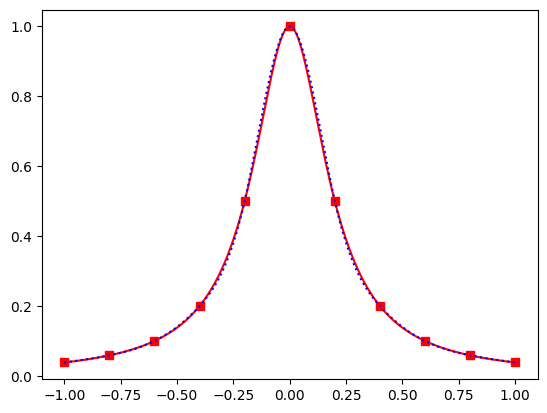

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b055168b0>

In [61]:
itp3 = CubicSplineInterpolation((x,), y; bc=Line(OnGrid()));

yy3 = itp3.(xx)

plot(x, y, "rs")
plot(xx, yy, "r-")
plot(xx, yy3, "b:")

In [62]:
function compare(h, x)
    xp = -1:h:1
    yp = f.(xp)
    
    
    itp1 =  interpolate((xp,),  yp, Gridded(Constant()));
    itp2 =  interpolate((xp,),  yp, Gridded(Linear()));
    itp3 = CubicSplineInterpolation((xp,), yp, bc=Flat(OnGrid()));
    fx = f(x)
    return itp1(x)-fx, itp2(x)-fx, itp3(x)-fx
end


compare (generic function with 1 method)

In [63]:
hstep = [1.0, 0.5, 0.4, 0.2, 0.1, 0.05, 0.02, 0.01, 0.001]
nn = 2.0 ./ hstep
erra = [compare(h, -1+h/4) for h in hstep]
errb = [compare(h, h/4) for h in hstep];
errc = [compare(h, -0.9905) for h in hstep];
errd = [compare(h, 0.0005) for h in hstep];


In [64]:
ea1 = [abs(e[1]) for e in erra]
ea2 = [abs(e[2]) for e in erra]
ea3 = [abs(e[3]) for e in erra]

eb1 = [abs(e[1]) for e in errb]
eb2 = [abs(e[2]) for e in errb]
eb3 = [abs(e[3]) for e in errb];

ec1 = [abs(e[1]) for e in errc]
ec2 = [abs(e[2]) for e in errc]
ec3 = [abs(e[3]) for e in errc];

ed1 = [abs(e[1]) for e in errd]
ed2 = [abs(e[2]) for e in errd]
ed3 = [abs(e[3]) for e in errd];

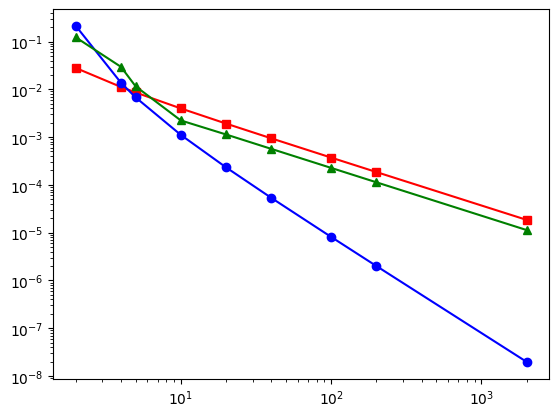

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b03231d30>

In [65]:
loglog(nn, ea1, "rs-")
loglog(nn, ea2, "bo-")
loglog(nn, ea3, "g^-")


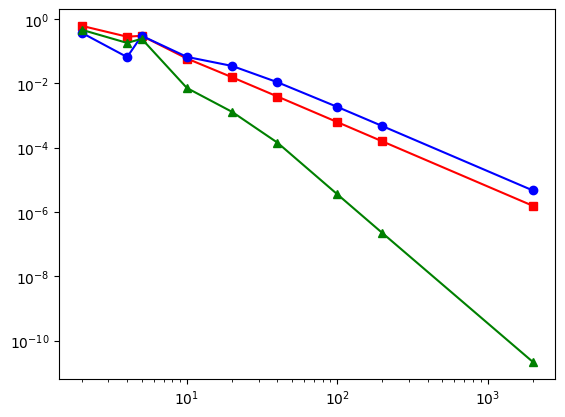

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b055b1d00>

In [66]:
loglog(nn, eb1, "rs-")
loglog(nn, eb2, "bo-")
loglog(nn, eb3, "g^-")


### Problema 4

Crie funções para fazer os seguintes problemas de mínimos quadrados:
 * $y = a_0 x^ {a_1}$
 * $y = a_0 \exp \left( a_1 \cdot x\right)$
 * Polinômio genérico de ordem n



### $y = a_0 x^ a_1$

Este é um problema não linear! Então precisamos transformar isso em um problema linear.

Tirando o log dos dois lados temos uma expressão do tipo:

$$
\log y = \log a_0 + a_1 \cdot \log x
$$

Agora é fazer o ajuste disso.

In [69]:
function powerfit(x, y)
    lnx = log.(x)
    lny = log.(y)
    fit = linfit(lnx, lny)
    return [exp(fit[1]), fit[2]]
end


powerfit (generic function with 1 method)

In [70]:
x = 1.0:0.2:5.0
y = 1.1 .* x .^ (-2.2);

In [71]:
powerfit(x, y)

2-element Array{Float64,1}:
  1.1000000000000025
 -2.200000000000002

### $y = a_0 \exp \left(a_1 \cdot x\right)$

Este problema também é não linear! Então precisamos transformar isso em um problema linear.

Tirando o log dos dois lados temos uma expressão do tipo:

$$
\log y = \log a_0 + a_1 \cdot x
$$


In [72]:
function expfit(x, y)
    lny = log.(y)
    fit = linfit(x, lny)
    return [exp(fit[1]), fit[2]]
end

expfit (generic function with 1 method)

In [73]:
x = 1.0:0.2:5.0
y = 1.1 .* exp.(2.2 .* x);

In [74]:
expfit(x, y)

2-element Array{Float64,1}:
 1.1000000000000072
 2.199999999999998

### Ajuste polinomial

Agora queremos ajustar os pontos com um polinômio de grau $n$:

$$
y = a_0 + a_1\cdot x + a_2\cdot x^2 + \cdots + a_n\cdot x^n
$$

Usando o método dos mínimo quadrados, chegamos à seguinte equação:

$$
\left(
\begin{matrix}
\sum_{i=1}^Q 1 & \sum_{i=1}^Q x_i & \cdots & \sum_{i=1}^Q x_i^n \\
\sum_{i=1}^Q x_i & \sum_{i=1}^Q x_i^2 &  \cdots & \sum_{i=1}^Q x_i^{n+1}\\
\vdots & \vdots & \ddots & \vdots \\
\sum_{i=1}^Q x_i^n & \sum_{i=1}^Q x_i^{n+1} &  \cdots & \sum_{i=1}^Q x_i^{2n} \\
\end{matrix}\right)
\cdot
\left(\begin{matrix} a_0 \\ a_1 \\ \vdots \\ a_n \end{matrix}\right)
= 
\left(\begin{matrix} \sum_{i=1}^Q y_i \\ \sum_{i=1}^Q y_i x_i \\  \vdots \\ \sum_{i=1}^Q y_i x_i^n\end{matrix}\right)
$$
 





In [75]:
function polyfit(x, y, n, var=:x)
    A = zeros(n+1, n+1)
    b = zeros(n+1)
    S = zeros(2n + 1)
    
    npts = length(x)
    
    S[1] = npts
    
    for i in 1:2n
        s = 0.0
        for k in 1:npts
            s += x[k]^i
        end
        S[i+1] = s
    end
    
    b[1] = sum(y)
    
    for i in 1:n
        s = 0.0
        for k in 1:npts
            s += y[k]*x[k]^i
        end
        b[i+1] = s
    end
    
    for j in 0:n
        for i in 0:n
            A[i+1,j+1] = S[i+j+1]
        end
    end
    
    return Polynomial(A\b, var)
    
end


polyfit (generic function with 2 methods)

In [76]:
f4(x) = 1.0 + x + x^2

f4 (generic function with 1 method)

In [77]:
x = 0:0.2:10
y = f4.(x);

In [78]:
polyfit(x, y, 2)

Polynomial(1.00000000000002 + 0.9999999999999692*x + 1.0000000000000036*x^2)

In [79]:
polyfit(x, y, 3)

Polynomial(1.0000000000002023 + 0.9999999999997943*x + 1.000000000000043*x^2 - 2.4828127570366473e-15*x^3)

In [80]:
polyfit(x, y, 4)

Polynomial(0.9999999999999191 + 1.000000000000223*x + 0.9999999999998992*x^2 + 1.4440592906252947e-14*x^3 - 6.433927532500735e-16*x^4)

In [81]:
polyfit(x, y, 5)

Polynomial(1.0000000000459608 + 0.9999999998481588*x + 1.0000000001072407*x^2 - 2.840956965638937e-11*x^3 + 3.16162639549699e-12*x^4 - 1.2494371086308562e-13*x^5)